In [1]:
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../batteryratecap')
import correlationtest

In [2]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

## Load Dataframe

In [3]:
df = pd.read_csv('../doc/Data/visualization_df.csv')

In [4]:
df = df[{'n','tau','Q','Cathode \nThickness [µm]'}]
df = df.dropna() #drop all rows with Nan
df

,tau,n,Cathode \nThickness [µm],Q
0,0.485641,1.302511,500.0,106.109020
1,0.487356,1.171666,500.0,105.112479
2,0.000000,0.000000,550.0,0.000000
3,0.000000,0.000000,350.0,0.000000
4,0.000000,0.000000,350.0,0.000000
5,0.000000,0.000000,60.0,0.000000
6,0.000000,0.000000,120.0,0.000000
7,0.000000,0.000000,170.0,0.000000
8,0.000000,0.000000,120.0,0.000000
9,0.000000,0.000000,120.0,0.000000


## Pearson Correlation Testing

In [5]:
# Set variables
n = df['n'].values
tau = df['tau'].values
L = df['Cathode \nThickness [µm]'].values

In [6]:
# Pearson correlation
correlationtest.correlation_hypothesis(n,tau,0.05)
correlationtest.correlation_hypothesis(n,L,0.05)
correlationtest.correlation_hypothesis(tau,L,0.05)

pearson correlation betweeen the input variables is 0.42 with p value 0.08
Accept null hypothesis. The linear correlation  is statistically insignificant
pearson correlation betweeen the input variables is -0.28 with p value 0.26
Accept null hypothesis. The linear correlation  is statistically insignificant
pearson correlation betweeen the input variables is 0.30 with p value 0.22
Accept null hypothesis. The linear correlation  is statistically insignificant


(0.30162912081699506, 0.22382698382668378)

## Spearman Correlation
Unlike Pearson correlation, Spearman correlation does not require the input sample to be normally distributed.

In [7]:
# Spearman correlation
correlationtest.correlation_hypothesis(n,tau,0.05,test='spearman')
correlationtest.correlation_hypothesis(n,L,0.05,test='spearman')
correlationtest.correlation_hypothesis(tau,L,0.05,test='spearman')

spearman correlation betweeen the input variables is 0.79 with p value 0.00
Reject null hypothesis.The linear correlation is statistically significant
spearman correlation betweeen the input variables is -0.31 with p value 0.22
Accept null hypothesis. The linear correlation  is statistically insignificant
spearman correlation betweeen the input variables is 0.12 with p value 0.65
Accept null hypothesis. The linear correlation  is statistically insignificant


(0.1153179038718819, 0.6486389665584609)

## Calculate and plot linear regression line
See [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) for more information on the linear regression method.

Slope is 0.08508011139259548
Intercept is 0.0764891692182361
Standard deviation is 0.04583201696998733


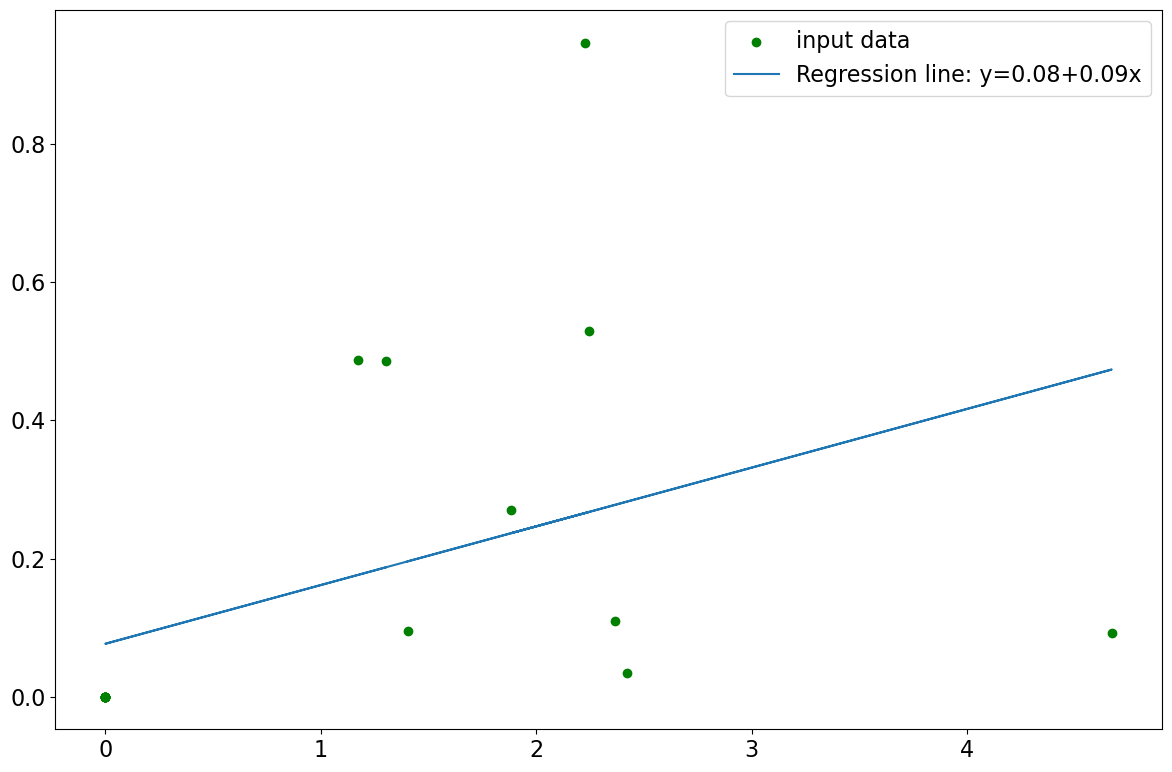

In [8]:
slope, intercept, stderr = correlationtest.plot_linear_regression(n, tau)
print('Slope is', slope)
print('Intercept is', intercept)
print('Standard deviation is', stderr)

## Identify outlier data points that contribute the most to the standard error

original std error is 0.04583201696998733
Detect outlier at position x= 2.2239192560183927 y= 0.9472680583112576
Detect outlier at position x= 1.1716655512348142 y= 0.4873564814643751
Detect outlier at position x= 1.3025114653628662 y= 0.4856405600758227
new std error is 0.024429776142287366


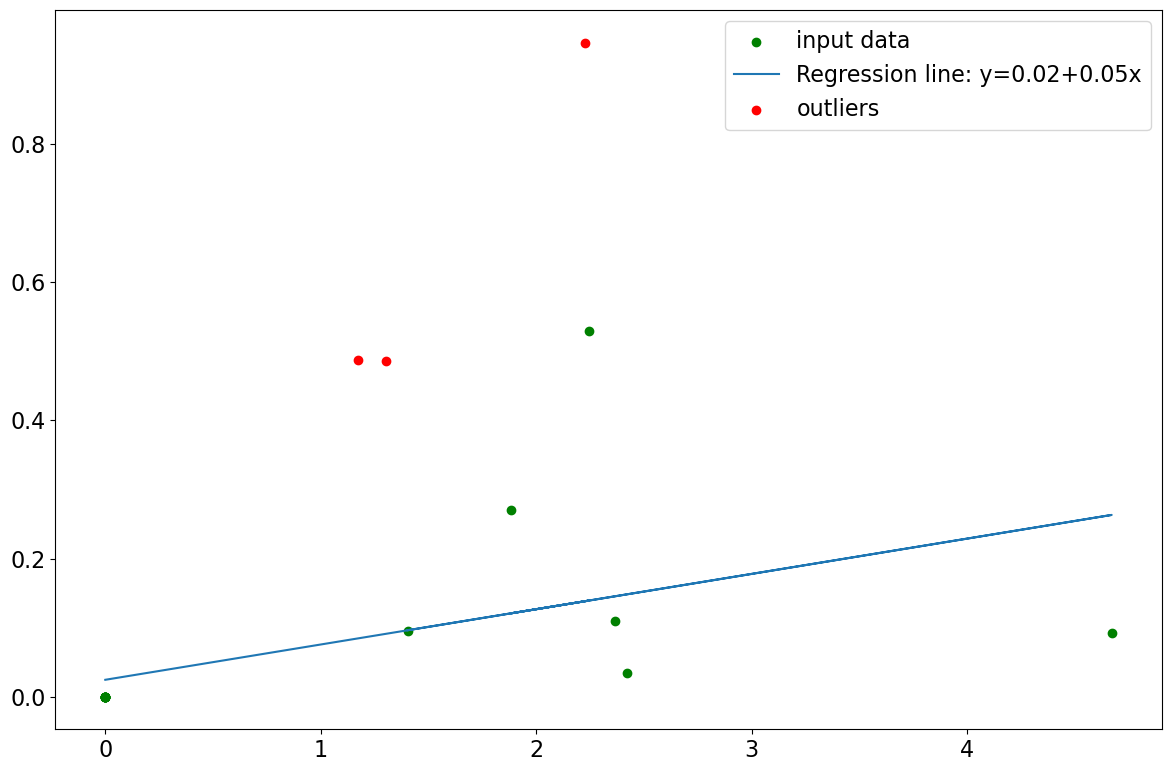

In [9]:
x_no_outliers, y_no_outliers = correlationtest.linear_outliers(n,tau,3)